---
## 보영

##### 생략하는 코드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [ ]:
!pip install pandas
import pandas as pd

recall = pd.read_csv('./recall.csv', encoding='cp949')

# '리콜개시일' 컬럼에서 연도 정보만 추출하여 새로운 컬럼 추가
recall['리콜개시연도'] = pd.to_datetime(recall['리콜개시일']).dt.year

# '제작자'와 '리콜개시연도'를 기준으로 그룹화하여 리콜 발생 건수 계산
manufacturer_recall = recall.groupby(['제작자', '리콜개시연도']).size().reset_index(name='리콜건수')

# 상위 20개 제작자 선택
top_20_manufacturers = manufacturer_recall.nlargest(20, '리콜건수')

# 결과 확인
print(top_20_manufacturers)


               제작자  리콜개시연도  리콜건수
19     비엠더블유코리아(주)    2022   432
15   메르세데스벤츠코리아(주)    2022   330
28  폭스바겐그룹코리아 주식회사    2022   216
33        현대자동차(주)    2022    61
14     만트럭버스코리아(주)    2022    41
9           기아주식회사    2022    38
26  포드세일즈서비스코리아(유)    2022    37
6         (주)에프엠케이    2022    31
21    스텔란티스코리아주식회사    2022    31
7    (주)재규어랜드로버코리아    2022    26
0         (유)기흥모터스    2022    21
25     테슬라코리아 유한회사    2022    20
27     포르쉐코리아 주식회사    2022    20
35         화창상사(주)    2022    16
34        혼다코리아(주)    2022    15
4      (주)볼보자동차코리아    2022    13
20    스카니아코리아그룹(주)    2022    10
11     다임러트럭코리아(주)    2022     9
13   르노코리아자동차 주식회사    2022     7
8           (주)피라인    2022     5


### 제작자별 리콜건수
- 상위 20개 제작자의 리콜 건수를 시각화하는 막대 그래프

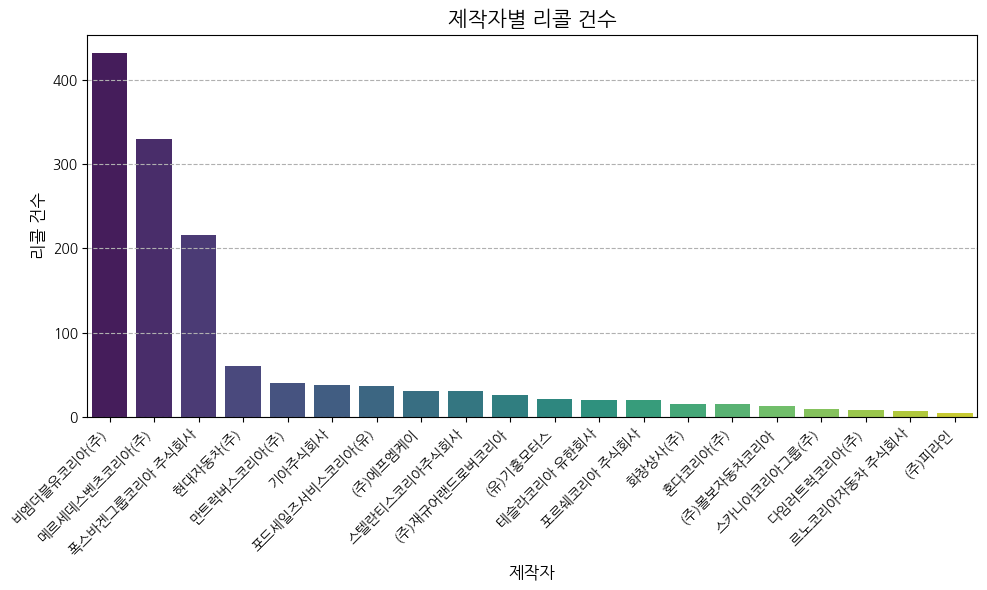

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화: 제작자별 리콜 건수 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='제작자', y='리콜건수', data=top_20_manufacturers, palette='viridis')
plt.title('제작자별 리콜 건수', fontsize=15)  # 제목 크기 설정
plt.xlabel('제작자', fontsize=12)  # x축 레이블 크기 설정
plt.ylabel('리콜 건수', fontsize=12)  # y축 레이블 크기 설정
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬 설정
plt.yticks(fontsize=10)  # y축 레이블 크기 설정
plt.grid(axis='y', linestyle='--')  # y축 그리드 라인 추가
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

### 생산시작 연도별 리콜 현황
- '생산기간(부터)' 컬럼의 연도 정보를 바탕으로 연도별 리콜 건수를 집계

    생산시작연도  리콜건수
0     2004     2
1     2005    21
2     2006    27
3     2007    17
4     2008    11
5     2009    24
6     2010    14
7     2011    11
8     2012    23
9     2013    45
10    2014    52
11    2015    67
12    2016    61
13    2017    68
14    2018   113
15    2019   198
16    2020   273
17    2021   278
18    2022   114


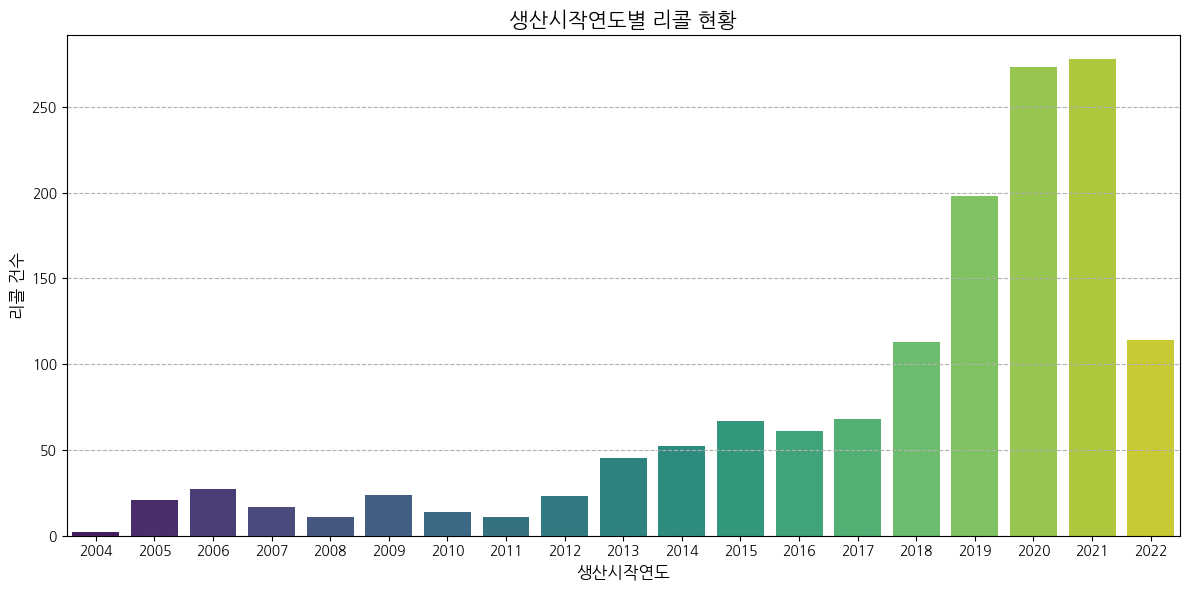

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
recall = pd.read_csv('./recall.csv', encoding='cp949')

# '생산기간(부터)' 컬럼에서 연도 정보만 추출하여 '생산시작연도' 컬럼 추가
recall['생산시작연도'] = pd.to_datetime(recall['생산기간(부터)']).dt.year

# 생산시작연도별 리콜 현황 계산
yearly_recall = recall.groupby('생산시작연도').size().reset_index(name='리콜건수')

print(yearly_recall)

# 시각화: 생산시작연도별 리콜 현황 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='생산시작연도', y='리콜건수', data=yearly_recall, palette='viridis')
plt.title('생산시작연도별 리콜 현황', fontsize=15)
plt.xlabel('생산시작연도', fontsize=12)
plt.ylabel('리콜 건수', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


### 리콜까지 걸린 시간 (생산기간 마지막날부터 리콜개시일까지)
-  리콜 개시일과 생산 종료일 사이의 일수 차이를 계산

              제작자                        차명   생산기간(부터)   생산기간(까지)      리콜개시일  \
0        혼다코리아(주)               CBR1000RR-R 2021-04-29 2021-05-12 2022-01-03   
1  폭스바겐그룹코리아 주식회사     Polo 5 FL 1.4 TDI BMT 2014-11-17 2014-11-25 2022-01-05   
2  폭스바겐그룹코리아 주식회사  Jetta 6 FL 2.0 TDI 110PS 2014-11-05 2015-02-26 2022-01-05   
3  폭스바겐그룹코리아 주식회사         Jetta 1.6 TDI BMT 2011-02-28 2012-09-25 2022-01-05   
4  폭스바겐그룹코리아 주식회사       Golf A7 1.6 TDI BMT 2014-12-19 2015-02-26 2022-01-05   

   리콜개시일까지_일수차  
0          236  
1         2598  
2         2505  
3         3389  
4         2505  


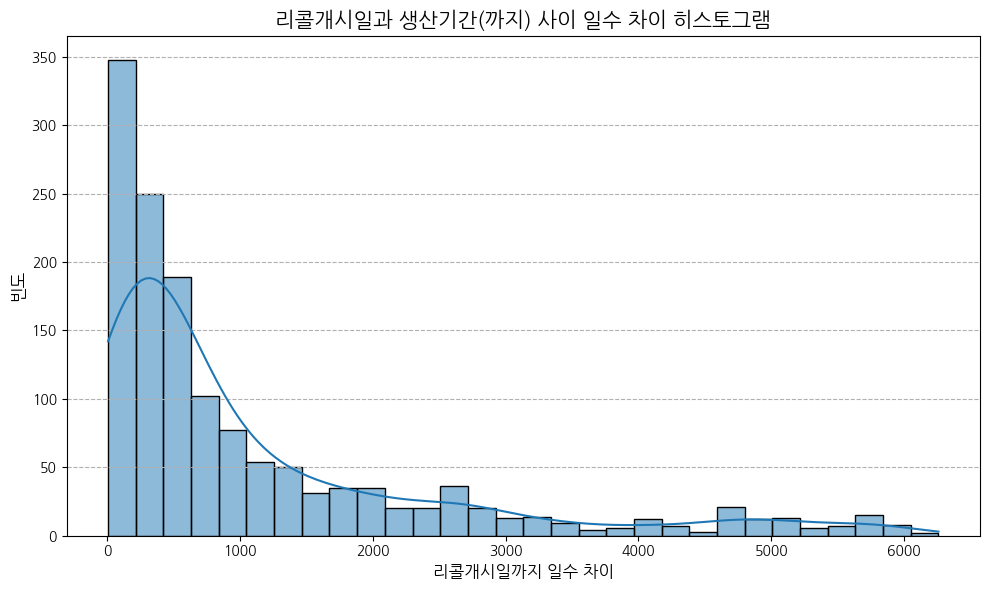

In [ ]:
import pandas as pd

# 데이터 불러오기
recall = pd.read_csv('./recall.csv', encoding='cp949')

# '생산기간(부터)'과 '생산기간(까지)' 컬럼을 datetime 형식으로 변환
recall['생산기간(부터)'] = pd.to_datetime(recall['생산기간(부터)'])
recall['생산기간(까지)'] = pd.to_datetime(recall['생산기간(까지)'])
recall['리콜개시일'] = pd.to_datetime(recall['리콜개시일'])

# 리콜개시일과 생산기간(까지) 사이의 일수 차이 계산하여 새로운 컬럼 추가
recall['리콜개시일까지_일수차'] = (recall['리콜개시일'] - recall['생산기간(까지)']).dt.days

# 결과 확인
print(recall[['제작자', '차명', '생산기간(부터)', '생산기간(까지)', '리콜개시일', '리콜개시일까지_일수차']].head())

# 시각화: seaborn 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=recall, x='리콜개시일까지_일수차', bins=30, kde=True, palette='viridis', edgecolor='black')
plt.title('리콜개시일과 생산기간(까지) 사이 일수 차이 히스토그램', fontsize=15)
plt.xlabel('리콜개시일까지 일수 차이', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


---
## 채원

                 제작자  리콜개시일까지_일수차
0           (유)기흥모터스   254.952381
1         (주) 바이크코리아   185.666667
2       (주) 한국모터트레이딩   440.666667
3           (주)다산중공업  1665.000000
4        (주)볼보자동차코리아   122.923077
5     (주)스포츠모터사이클코리아   242.000000
6           (주)에프엠케이  1598.225806
7      (주)재규어랜드로버코리아   610.192308
8             (주)피라인   479.600000
9             기아주식회사   931.078947
10      기흥인터내셔널 유한회사   239.000000
11       다임러트럭코리아(주)   533.777778
12         대전기계공업(주)    46.000000
13     르노코리아자동차 주식회사   348.857143
14       만트럭버스코리아(주)   492.829268
15     메르세데스벤츠코리아(주)   940.063636
16        모토스타코리아(주)   727.500000
17        범한자동차 주식회사   261.750000
18        볼보트럭코리아(주)   119.750000
19       비엠더블유코리아(주)  1993.446759
20      스카니아코리아그룹(주)   576.400000
21      스텔란티스코리아주식회사   808.193548
22         유한회사 모토로싸  1592.000000
23          주식회사 마이브   397.000000
24          지엠코리아(주)   139.750000
25       테슬라코리아 유한회사   364.850000
26    포드세일즈서비스코리아(유)  1017.918919
27       포르쉐코리아 주식회사   213.550000
28    폭스바겐그룹코리

<ipython-input-5-a523e518a2cc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='리콜개시일까지_일수차', y='제작자', data=mean_days_by_manufacturer, palette='viridis')


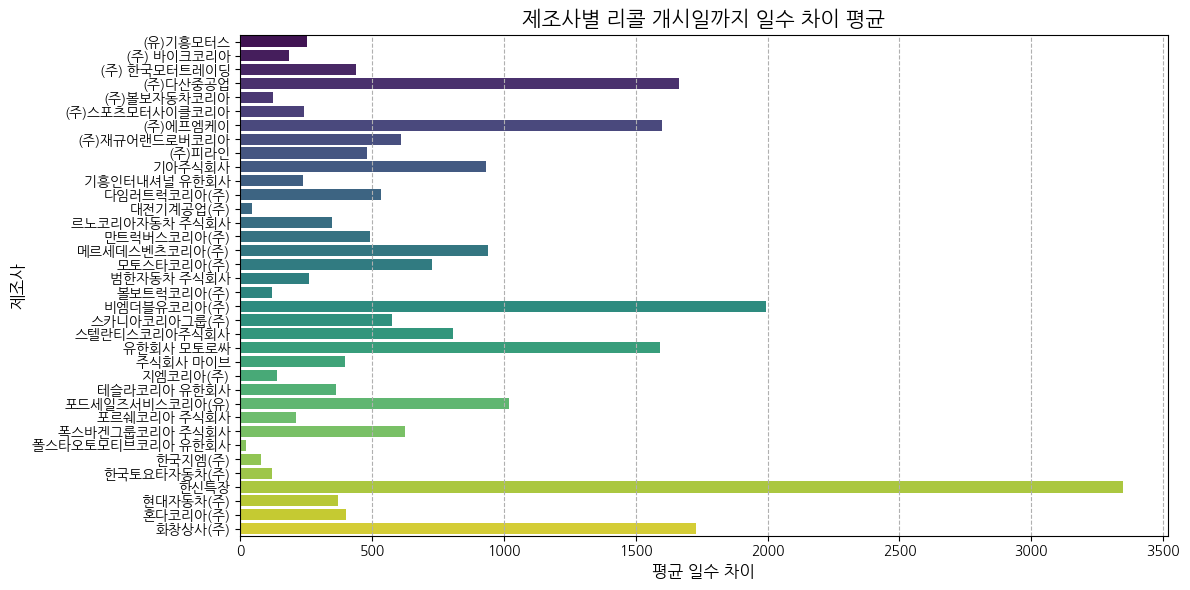

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
recall = pd.read_csv("/content/drive/MyDrive/Data/한국교통안전공단_자동차결함 리콜현황_20221231.csv", encoding='euc-kr')

# '생산기간(부터)'과 '생산기간(까지)' 컬럼을 datetime 형식으로 변환
recall['생산기간(부터)'] = pd.to_datetime(recall['생산기간(부터)'])
recall['생산기간(까지)'] = pd.to_datetime(recall['생산기간(까지)'])
recall['리콜개시일'] = pd.to_datetime(recall['리콜개시일'])

# 리콜개시일과 생산기간(까지) 사이의 일수 차이 계산하여 새로운 컬럼 추가
recall['리콜개시일까지_일수차'] = (recall['리콜개시일'] - recall['생산기간(까지)']).dt.days

# 제조사별 일수 차이 평균 계산
mean_days_by_manufacturer = recall.groupby('제작자')['리콜개시일까지_일수차'].mean().reset_index()

# 결과 확인
print(mean_days_by_manufacturer)

# 시각화: 제조사별 리콜 개시일까지 일수 차이 평균 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='리콜개시일까지_일수차', y='제작자', data=mean_days_by_manufacturer, palette='viridis')
plt.title('제조사별 리콜 개시일까지 일수 차이 평균', fontsize=15)
plt.xlabel('평균 일수 차이', fontsize=12)
plt.ylabel('제조사', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


<ipython-input-7-1e69ad1a6069>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='리콜개시일까지_일수차', y='제작자', data=filtered_data, palette='viridis', order=filtered_data['제작자'])


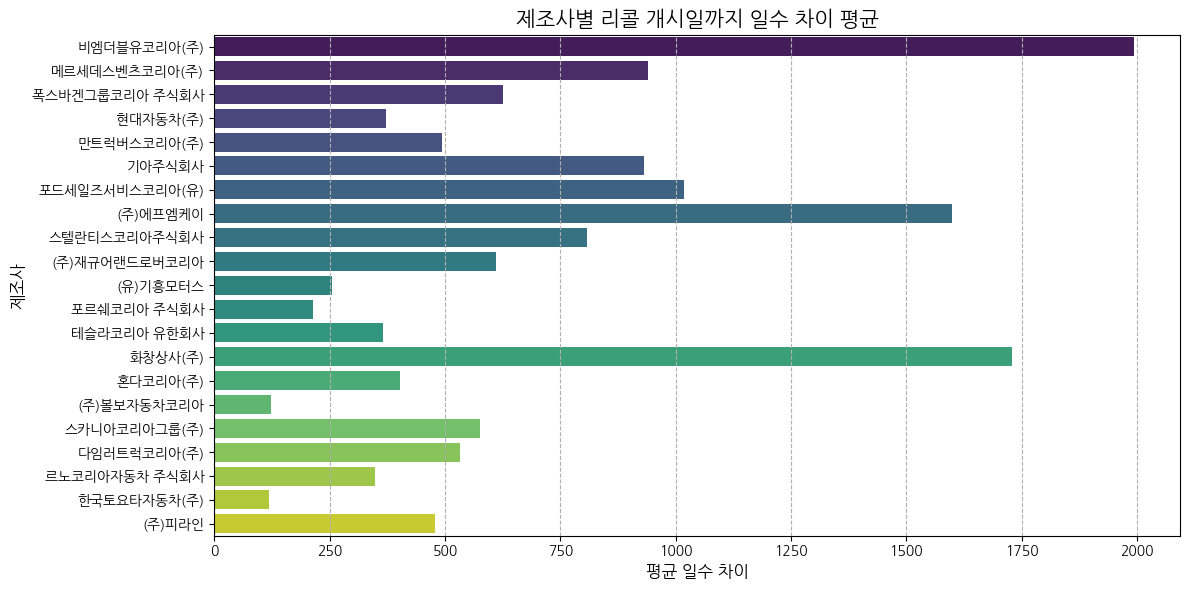

In [7]:

# 브랜드(제작자)별 카운트
brand_counts = recall['제작자'].value_counts()

# 제조사를 카운트 순으로 정렬
mean_days_by_manufacturer['count'] = mean_days_by_manufacturer['제작자'].map(brand_counts)
mean_days_by_manufacturer = mean_days_by_manufacturer.sort_values(by='count', ascending=False)

# "스카니아코리아그룹"까지만 필터링
scania_index = mean_days_by_manufacturer[mean_days_by_manufacturer['제작자'] == '스카니아코리아그룹(주)'].index[0]
filtered_data = mean_days_by_manufacturer.iloc[:scania_index + 1]

# 시각화: 제조사별 리콜 개시일까지 일수 차이 평균 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='리콜개시일까지_일수차', y='제작자', data=filtered_data, palette='viridis', order=filtered_data['제작자'])
plt.title('제조사별 리콜 개시일까지 일수 차이 평균', fontsize=15)
plt.xlabel('평균 일수 차이', fontsize=12)
plt.ylabel('제조사', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


##### 생략하는 코드

In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)

# 폰트 적용
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd

# euc-kr 인코딩으로 CSV 파일 읽기
df_data = pd.read_csv("/content/drive/MyDrive/Data/한국교통안전공단_자동차결함 리콜현황_20221231.csv", encoding='euc-kr')

# '리콜개시일' 컬럼을 datetime 형식으로 변환
df_data['리콜개시일'] = pd.to_datetime(df_data['리콜개시일'])

# 새로운 칼럼 '리콜시기' 추가
df_data['리콜시기'] = df_data['리콜개시일'].dt.day.apply(lambda x: '월초' if x <= 15 else '월말')

# 결과 확인
print(df_data.tail(3))

In [ ]:

# 브랜드(제작자)별 카운트
brand_counts = df_data['제작자'].value_counts()

# 결과 출력
print(brand_counts)

제작자
비엠더블유코리아(주)         432
메르세데스벤츠코리아(주)       330
폭스바겐그룹코리아 주식회사      216
현대자동차(주)             61
만트럭버스코리아(주)          41
기아주식회사               38
포드세일즈서비스코리아(유)       37
(주)에프엠케이             31
스텔란티스코리아주식회사         31
(주)재규어랜드로버코리아        26
(유)기흥모터스             21
테슬라코리아 유한회사          20
포르쉐코리아 주식회사          20
화창상사(주)              16
혼다코리아(주)             15
(주)볼보자동차코리아          13
스카니아코리아그룹(주)         10
다임러트럭코리아(주)           9
르노코리아자동차 주식회사         7
(주)피라인                5
한국토요타자동차(주)           5
지엠코리아(주)              4
범한자동차 주식회사            4
대전기계공업(주)             4
볼보트럭코리아(주)            4
한국지엠(주)               3
(주) 바이크코리아            3
(주) 한국모터트레이딩          3
(주)다산중공업              2
모토스타코리아(주)            2
기흥인터내셔널 유한회사          1
폴스타오토모티브코리아 유한회사      1
주식회사 마이브              1
유한회사 모토로싸             1
한신특장                  1
(주)스포츠모터사이클코리아        1
Name: count, dtype: int64


### 리콜 시기: 월말/월초 비교

In [ ]:

# '리콜시기'별 개수 카운트
count_series = df_data['리콜시기'].value_counts()

# 결과 출력
print(count_series)

리콜시기
월말    809
월초    610
Name: count, dtype: int64


##### 월말/월초 시각화

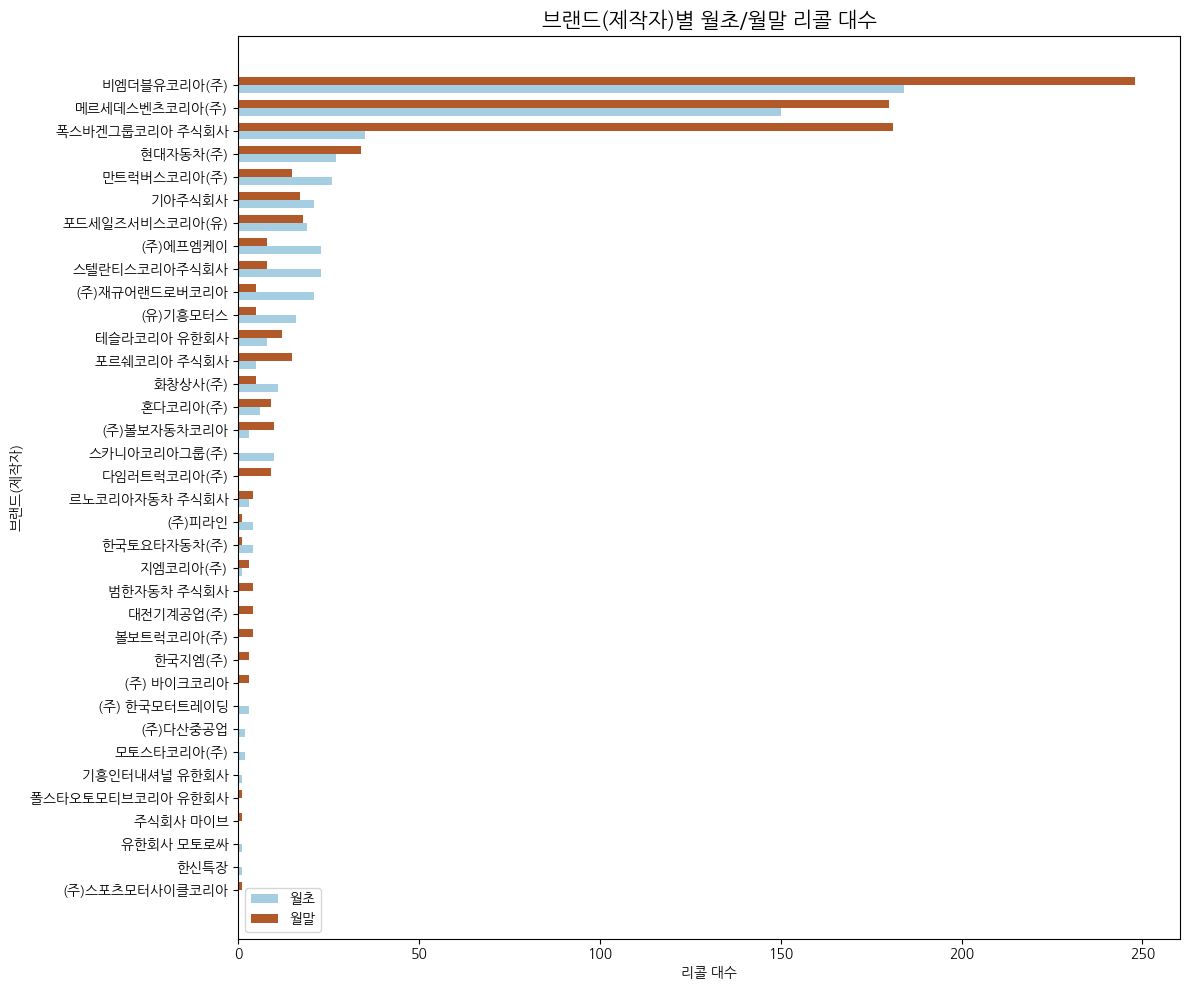

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 브랜드(제작자)별 카운트 계산
brand_counts = df_data['제작자'].value_counts()

# 제작자를 내림차순으로 정렬하여 y축 순서 설정
sorted_brands = brand_counts.index.tolist()[::-1]  # 내림차순 정렬

# 월초/월말 리콜 대수를 계산
df_counts = df_data.groupby(['제작자', '리콜시기']).size().unstack(fill_value=0)

# y축 순서에 맞게 데이터프레임 재정렬
df_counts = df_counts.loc[sorted_brands]

# 그룹된 막대 그래프 그리기
plt.figure(figsize=(12, 10))  # 그래프 크기 조정

bar_width = 0.35
index = np.arange(len(df_counts.index))

colors = plt.cm.Paired(np.linspace(0, 1, 2))

plt.barh(index - bar_width/2, df_counts['월초'], height=bar_width, label='월초', color=colors[0])
plt.barh(index + bar_width/2, df_counts['월말'], height=bar_width, label='월말', color=colors[1])

plt.ylabel('브랜드(제작자)')
plt.xlabel('리콜 대수')
plt.title('브랜드(제작자)별 월초/월말 리콜 대수', fontsize=15, fontweight='bold')
plt.yticks(index, df_counts.index)
plt.legend()

plt.tight_layout()
plt.show()


기업이 너무 많아서, 리콜 건수가 10건 이상인 기업만 골라 다시 시각화

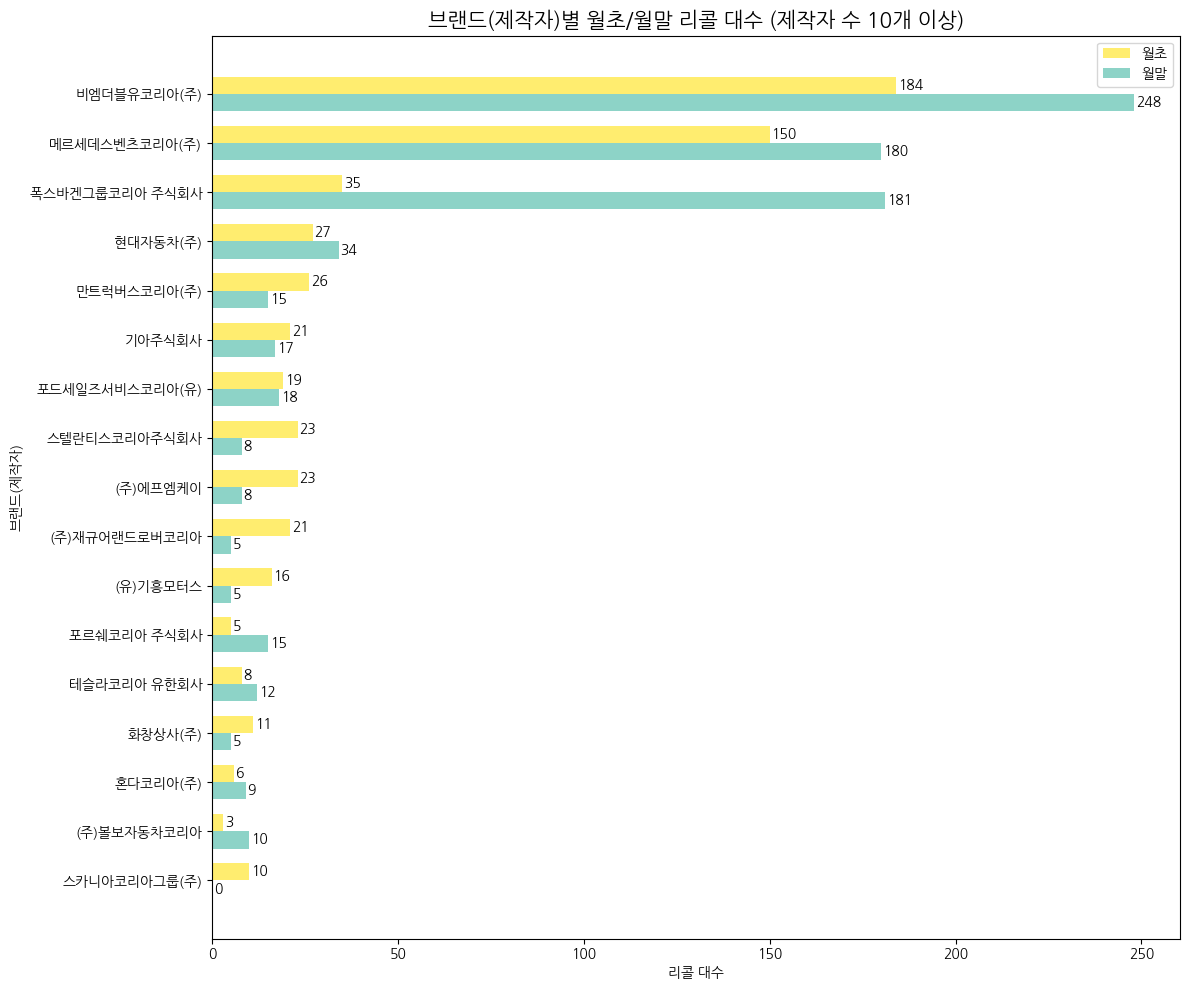

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 브랜드(제작자)별 카운트 계산
brand_counts = df_data['제작자'].value_counts()

# 제작자 수가 10개 이상인 것만 필터링
large_brands = brand_counts[brand_counts >= 10].index.tolist()

# 필터링된 데이터프레임 생성
df_filtered = df_data[df_data['제작자'].isin(large_brands)]

# 월초/월말 리콜 대수를 계산
df_counts = df_filtered.groupby(['제작자', '리콜시기']).size().unstack(fill_value=0)

# 제작자를 내림차순으로 정렬하여 y축 순서 설정
sorted_brands = df_counts.sum(axis=1).sort_values(ascending=True).index.tolist()

# y축 순서에 맞게 데이터프레임 재정렬
df_counts = df_counts.loc[sorted_brands]

# 그룹된 막대 그래프 그리기
plt.figure(figsize=(12, 10))  # 그래프 크기 조정

bar_width = 0.35
index = np.arange(len(df_counts.index))

colors = plt.cm.Set3(np.linspace(0, 1, 2))

# 월말 막대와 월초 막대를 먼저 그립니다.
bars1 = plt.barh(index - bar_width/2, df_counts['월말'], height=bar_width, label='월말', color=colors[0])
bars2 = plt.barh(index + bar_width/2, df_counts['월초'], height=bar_width, label='월초', color=colors[1])

plt.ylabel('브랜드(제작자)')
plt.xlabel('리콜 대수')
plt.title('브랜드(제작자)별 월초/월말 리콜 대수 (제작자 수 10개 이상)', fontsize=15, fontweight='bold')
plt.yticks(index, df_counts.index)

# 막대 바깥에 숫자 표시
for i in range(len(index)):
    plt.text(df_counts['월말'][i] + 0.5, index[i] - bar_width/2, str(df_counts['월말'][i]), va='center', ha='left', color='black')
    plt.text(df_counts['월초'][i] + 0.5, index[i] + bar_width/2, str(df_counts['월초'][i]), va='center', ha='left', color='black')

# legend의 순서를 월말-월초로 변경합니다.
plt.legend(handles=[bars2, bars1], labels=['월초', '월말'], loc='best')

plt.tight_layout()
plt.show()


### 리콜건수가 가장 많은 상위 3개 기업 (bmw, 벤츠, 폭스바겐) 워드클라우드 시각화


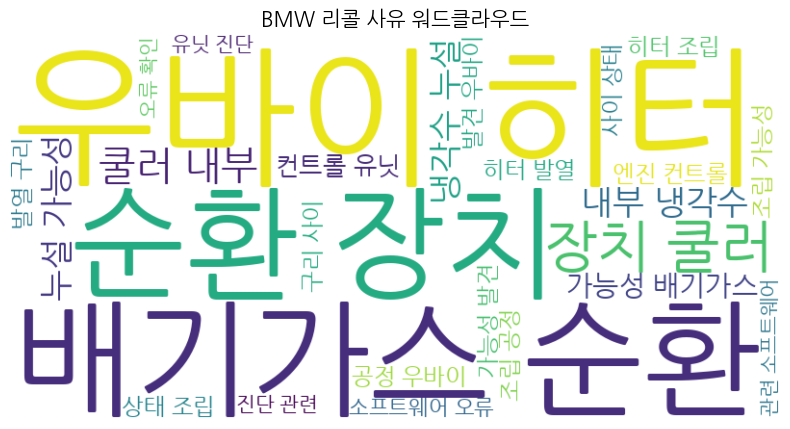

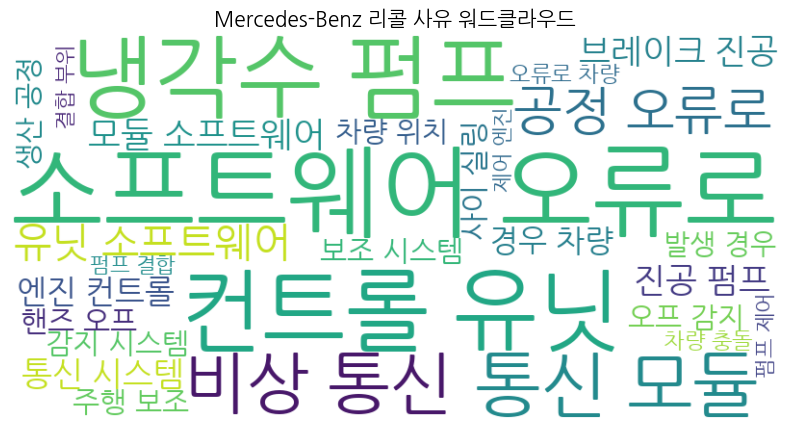

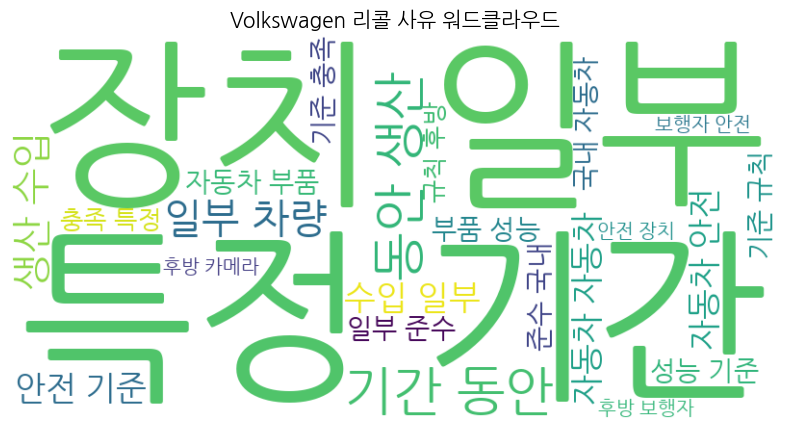

In [ ]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Okt 객체 생성
okt = Okt()

# 한국어 불용어 리스트 (예시)
stop_words = set(['그리고', '그러나', '하지만', '그래서', '때문에', '더구나', '그렇지만', '또한', '따라서', '그러므로'])

# 텍스트 전처리 함수
def preprocess_text(text):
    try:
        # 형태소 분석
        words = okt.nouns(text)
        # 불용어 제거
        words = [word for word in words if word not in stop_words and len(word) > 1]
        return ' '.join(words)
    except Exception as e:
        return ''

# 비엠더블유, 메르세데스, 폭스바겐 데이터만 필터링
bmw_data = df_data[df_data['제작자'] == '비엠더블유코리아(주)']
benz_data = df_data[df_data['제작자'] == '메르세데스벤츠코리아(주)']
vw_data = df_data[df_data['제작자'] == '폭스바겐그룹코리아 주식회사']

# 각 브랜드별 리콜 사유 텍스트 결합 및 전처리
bmw_text = preprocess_text(' '.join(bmw_data['리콜사유'].dropna().tolist()))
benz_text = preprocess_text(' '.join(benz_data['리콜사유'].dropna().tolist()))
vw_text = preprocess_text(' '.join(vw_data['리콜사유'].dropna().tolist()))

# 워드클라우드 생성 함수
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_font_size=300, min_font_size=20, font_step=6,
                          font_path=font_path).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15, fontweight='bold')
    plt.show()

# 워드클라우드 생성 및 시각화
create_wordcloud(bmw_text, 'BMW 리콜 사유 워드클라우드')
create_wordcloud(benz_text, 'Mercedes-Benz 리콜 사유 워드클라우드')
create_wordcloud(vw_text, 'Volkswagen 리콜 사유 워드클라우드')


---
## 재석

### 월별 리콜 현황 데이터
- 제작자별 리콜 횟수를 연도와 월별로 그룹화한 후, 각 월마다 상위 5개 제작자를 추출해 막대 그래프로 표시
- 특정 기간 동안 리콜이 많이 발생한 제조사를 한눈에 파악 가능

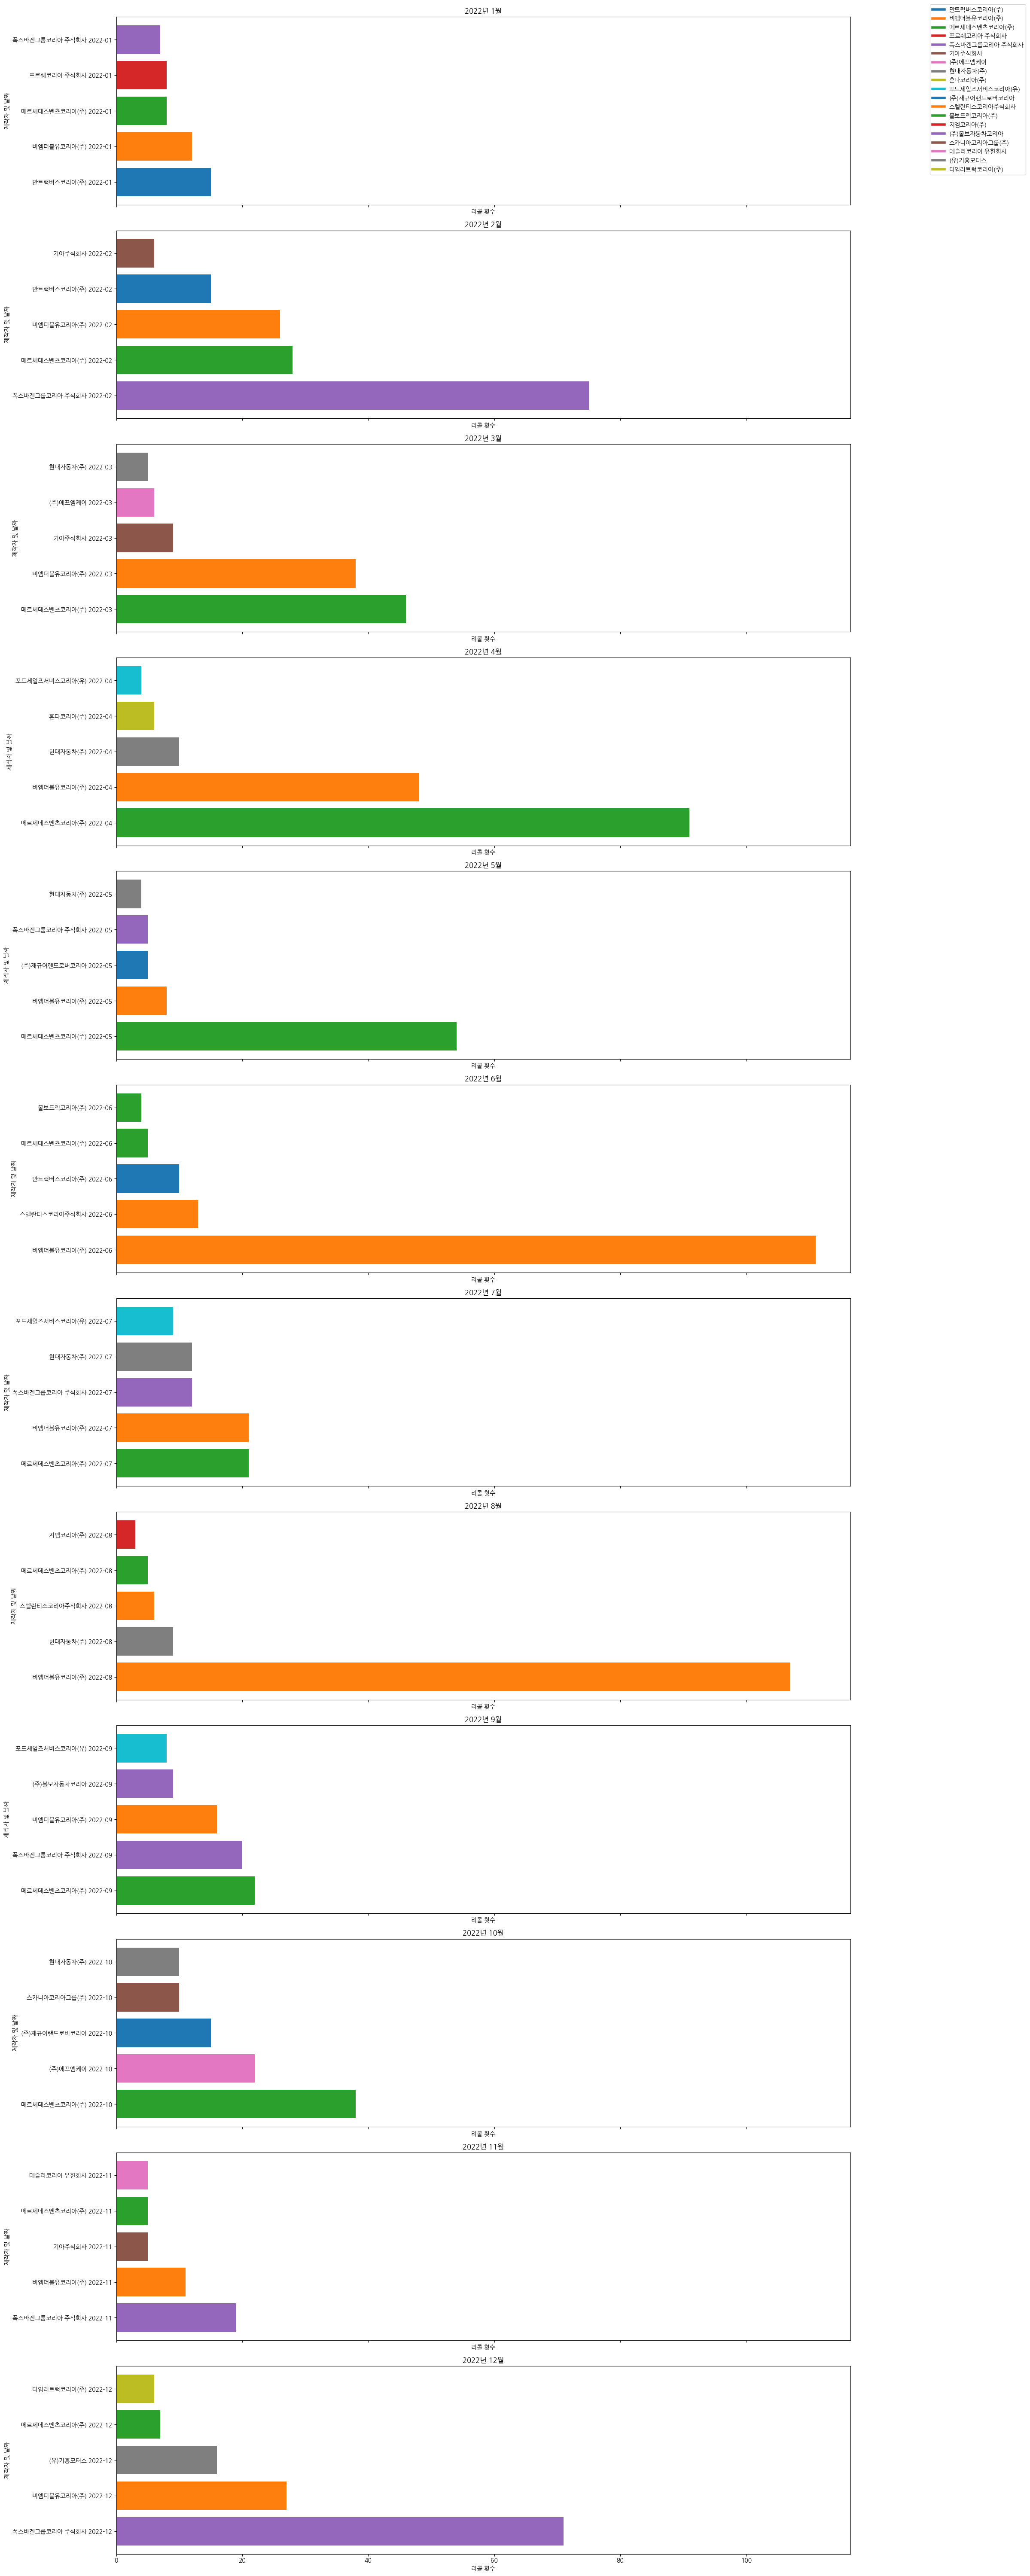

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with appropriate encoding
file_path = '/content/리콜현황_월별_정렬.csv'
data = pd.read_csv(file_path, encoding='cp949')

# Convert the '리콜개시일' column to datetime format
data['리콜개시일'] = pd.to_datetime(data['리콜개시일'])

# Extract year and month for grouping
data['연도'] = data['리콜개시일'].dt.year
data['월'] = data['리콜개시일'].dt.month

# Group by year, month, and 제작자, and count the occurrences
grouped_data = data.groupby(['연도', '월', '제작자']).size().reset_index(name='갯수')

# Get the top 5 제작자 per month
top_monthly_data = grouped_data.sort_values(['연도', '월', '갯수'], ascending=[True, True, False]).groupby(['연도', '월']).head(5)

# Assign colors to each 제조사 using the 'tab10' palette
unique_manufacturers = top_monthly_data['제작자'].unique()
colors = sns.color_palette("tab10", len(unique_manufacturers))
color_map = dict(zip(unique_manufacturers, colors))

# Plot the data
num_months = top_monthly_data['월'].nunique()
fig, axes = plt.subplots(num_months, 1, figsize=(20, num_months * 5), sharex=True)

for (year, month), group in top_monthly_data.groupby(['연도', '월']):
    ax = axes[month-1]
    ax.barh(group['제작자'] + ' ' + group['연도'].astype(str) + '-' + group['월'].astype(str).str.zfill(2),
            group['갯수'],
            color=[color_map[x] for x in group['제작자']])
    ax.set_title(f'{year}년 {month}월')
    ax.set_ylabel('제작자 및 날짜')
    ax.set_xlabel('리콜 횟수')

# Create a single legend for all subplots
handles = [plt.Line2D([0], [0], color=color_map[m], lw=4) for m in unique_manufacturers]
labels = unique_manufacturers
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


---
## 성욱

### 차종(모델)별 리콜 횟수 상위 20개
- 각 차종의 제작자에 따라 색상을 다르게 표시

In [ ]:
grouped_car_data = car_data.groupby('차명').agg({
    '생산기간(부터)': 'first',
    '리콜사유': lambda x: list(x),
    '제작자': 'first'
}).reset_index()

# Count occurrences and sort by count in descending order
grouped_car_data['count'] = car_data.groupby('차명').size().values
sorted_grouped_car_data = grouped_car_data.sort_values(by='count', ascending=False)

# Extract top 20
top_20_cars = sorted_grouped_car_data.head(20)

In [ ]:
top_20_cars

,차명,생산기간(부터),리콜사유,제작자,count
51,328i,2009-11-03,"[블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive tempera...",비엠더블유코리아(주),25
525,TGX,2019-07-24,[메인 퓨즈 박스의 공급업체의 신규 조립공장에서 생산 초기에 공정의 문제(퓨즈 고정...,만트럭버스코리아(주),22
524,TGS,2019-12-13,[메인 퓨즈 박스의 공급업체의 신규 조립공장에서 생산 초기에 공정의 문제(퓨즈 고정...,만트럭버스코리아(주),18
230,C 300,2021-03-15,[엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(ve...,메르세데스벤츠코리아(주),13
54,328xi,2009-09-14,"[블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive tempera...",비엠더블유코리아(주),11
486,S 350 d,2020-11-24,[메르세데스 미 서비스(Mercedes me)를 위해 차량과 본사 서버(backen...,메르세데스벤츠코리아(주),10
497,S 580 4MATIC,2020-07-09,[엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(ve...,메르세데스벤츠코리아(주),10
406,Maybach S 580 4MATIC,2020-09-11,[엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(ve...,메르세데스벤츠코리아(주),9
489,S 400 d 4MATIC,2021-07-09,[메르세데스 미 서비스(Mercedes me)를 위해 차량과 본사 서버(backen...,메르세데스벤츠코리아(주),9
492,S 500 4MATIC,2021-07-28,[메르세데스 미 서비스(Mercedes me)를 위해 차량과 본사 서버(backen...,메르세데스벤츠코리아(주),9


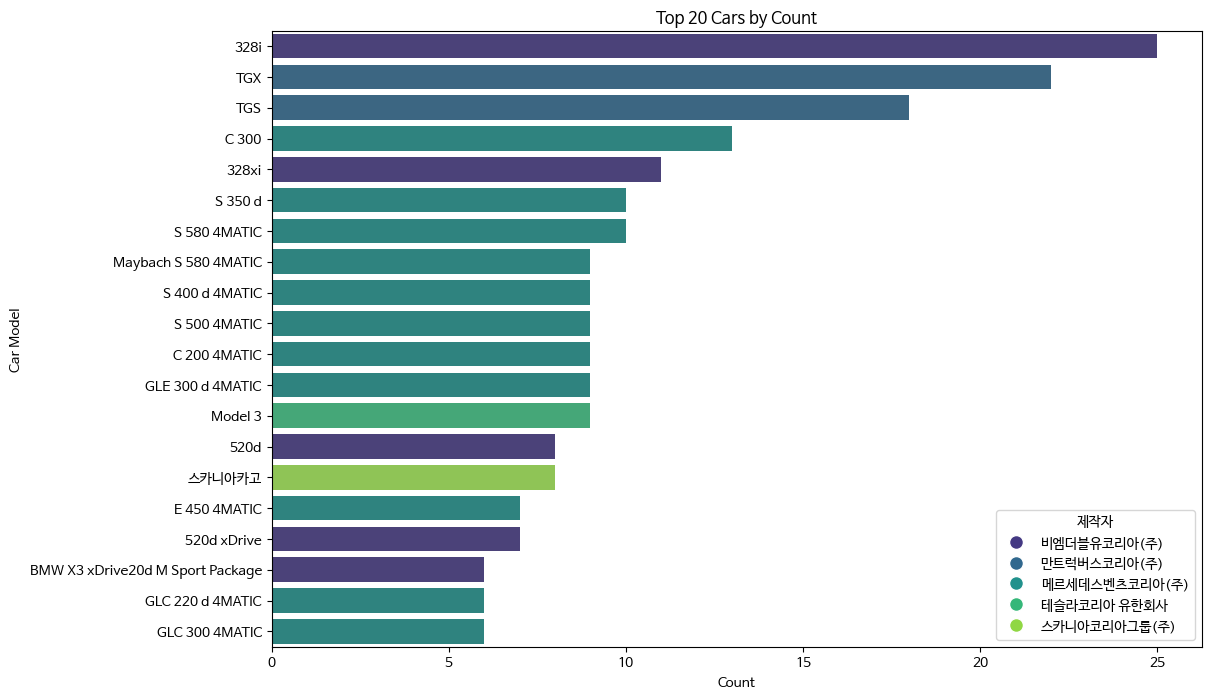

In [ ]:
# Prepare the data for plotting
top_20_cars['제작자'] = top_20_cars['제작자'].astype(str)  # Ensure the '제작자' column is of type string

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot with colors based on '제작자'
unique_manufacturers = top_20_cars['제작자'].unique()
palette = sns.color_palette('viridis', len(unique_manufacturers))
color_mapping = {manufacturer: palette[i] for i, manufacturer in enumerate(unique_manufacturers)}

# Apply the color mapping to the plot
sns.barplot(
    x='count',
    y='차명',
    data=top_20_cars,
    palette=[color_mapping[manufacturer] for manufacturer in top_20_cars['제작자']]
)

# Add titles and labels
plt.title('Top 20 Cars by Count')
plt.xlabel('Count')
plt.ylabel('Car Model')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[manufacturer], markersize=10) for manufacturer in unique_manufacturers]
plt.legend(handles, unique_manufacturers, title='제작자')

# Show the plot
plt.show()


### 제조사별 워드클라우드 (5개)
- 텍스트 전처리: 한국어 형태소 분석기인 Okt 사용 및 불용어 제거
- 제조사별 리콜 사유를 결합하여 워드클라우드 시각화

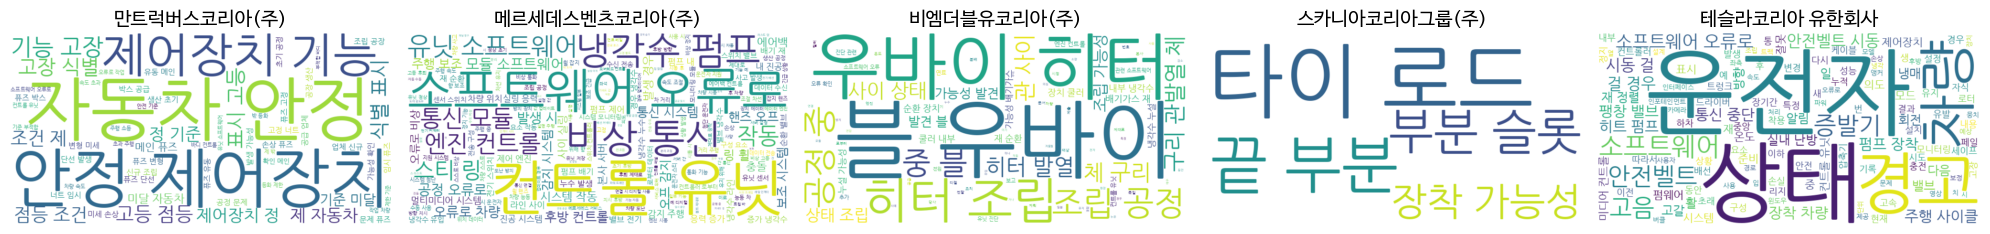

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter

# Define a list of Korean stopwords
stopwords = set([
    '으로', '에', '을', '의', '가', '이', '은', '는', '로', '에서', '와', '과', '도', '다', '를', '한', '를', '합니다', '등', '것', '및', '그', '또한', '그리고', '하지만', '더', '하지', '것이', '있다', '수', '때', '있습니다'
])

# Initialize the Okt (Open Korean Text) tokenizer
okt = Okt()

# Function to preprocess text by removing stopwords
def preprocess_text(text):
    tokens = okt.nouns(text)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# Combine all recall reasons for each manufacturer into a single string and preprocess
manufacturer_reasons = top_20_cars.groupby('제작자')['리콜사유'].apply(lambda x: ' '.join([' '.join(reason) for reason in x]))
manufacturer_reasons = manufacturer_reasons.apply(preprocess_text)

# Generate and plot a word cloud for each manufacturer
plt.figure(figsize=(20, 15))
for i, (manufacturer, reasons) in enumerate(manufacturer_reasons.items()):
    plt.subplot(4, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(reasons)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(manufacturer, fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()
